In [1]:
import numpy as np
import pandas as pd
import glob, os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'C:/Users/QlastyHS/Documents/Z dgxa/Resgc/'

par2save = ['layers', 'neurons', 'LR', 'dropout', 'act_fcn', 'epoch', 'kernel', 'stdDiagV', 'stdDiagT', \
            'fin_val_acc', 'best_val_acc', 'bestEpo', 'best_tst_acc']
os.chdir(path)

In [144]:
def getMergedResults(typeOf):
    baseDF = pd.DataFrame(columns=par2save)
    for file in glob.glob(typeOf): # 128 trials were split up to 8 independent threads, let's join the results
        fileData = pd.read_csv(path + file, delimiter=';')
        fileData = fileData.iloc[1:] # first row was filled up with 0s
        baseDF = baseDF.append(fileData)    
    return baseDF

In [145]:
dataRaw    = getMergedResults("*RAW.csv")
dataFeat   = getMergedResults("*F5feat.csv")
dataHLfeat = getMergedResults("*Fpcm.csv")

print(dataRaw.shape)
print(dataFeat.shape)
print(dataHLfeat.shape)

(128, 13)
(128, 13)
(128, 13)


### Display topologies and training results for top models
#### _raw_ data:

In [133]:
dataRaw.loc[dataRaw['best_val_acc'] > 0.964]

,layers,neurons,LR,dropout,act_fcn,epoch,kernel,stdDiagV,stdDiagT,fin_val_acc,best_val_acc,bestEpo,best_tst_acc
4,4,23,0.006980,0.7,<function elu at 0x7ff5f5c69668>,160,Xavier,3.029701,2.844762,0.000000,0.968642,115,0.964692
13,5,20,0.005672,0.7,<function selu at 0x7ff5f07b1b18>,220,He,2.955546,2.876093,0.000000,0.967408,175,0.963951
9,4,24,0.002355,0.7,<function selu at 0x7f2c69c2bb18>,310,He,3.025271,2.824113,0.962716,0.966667,205,0.963951
11,1,97,0.002689,1.0,<function tanh at 0x7f2c6ef90488>,385,None,3.076428,2.386519,0.960988,0.966914,280,0.968889


#### _features_ data:

In [126]:
dataFeat.loc[dataFeat['best_val_acc'] > 0.957]

,layers,neurons,LR,dropout,act_fcn,epoch,kernel,stdDiagV,stdDiagT,fin_val_acc,best_val_acc,bestEpo,best_tst_acc
1,1,65,0.004096,1.0,<function elu at 0x7f76b1a54668>,305,Xavier,2.733725,3.000584,0.000000,0.957778,255,0.953580
5,2,48,0.005117,0.7,<function softsign at 0x7fdec094bc80>,625,He,2.951418,2.903939,0.950617,0.958272,520,0.957531
1,1,78,0.004618,1.0,<function elu at 0x7f83435b5668>,300,None,2.798741,2.424032,0.949877,0.959506,195,0.960247


#### _HLfeatures_ data:

In [141]:
dataHLfeat.loc[dataHLfeat['best_val_acc'] > 0.936]

,layers,neurons,LR,dropout,act_fcn,epoch,kernel,stdDiagV,stdDiagT,fin_val_acc,best_val_acc,bestEpo,best_tst_acc
6,3,32,0.003548,1.0,<function elu at 0x7f2e00133668>,350,None,3.802309,4.262675,0.926667,0.937531,245,0.933827
8,1,90,0.008640,1.0,<function softsign at 0x7f2e0015ac80>,150,Xavier,4.166626,4.409050,0.918519,0.936296,75,0.933580
6,1,91,0.004312,1.0,<function tanh at 0x7ff763d0a488>,345,He,4.612991,4.359686,0.605185,0.936543,240,0.929630
3,3,33,0.007130,0.7,<function elu at 0x7fe894e62668>,260,None,4.565031,4.881526,0.000000,0.937778,200,0.931358
10,1,60,0.010896,1.0,<function softsign at 0x7ff04854ac80>,265,None,4.026130,4.382003,0.000000,0.936543,160,0.936050


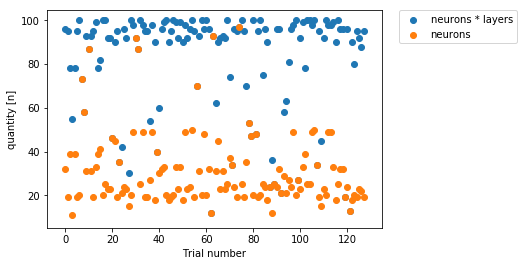

In [5]:
xr = range(0,dataRaw.shape[0])
plt.scatter(xr, dataRaw['neurons']*dataRaw['layers'], label='neurons * layers')
plt.scatter(xr, dataRaw['neurons'], label='neurons')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Trial number')
plt.ylabel('quantity [n]')

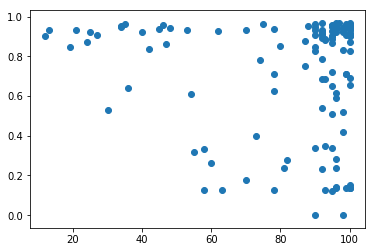

In [6]:
plt.scatter(dataRaw['neurons']*dataRaw['layers'],dataRaw['best_val_acc'], label='neurons * layers')
#axes = plt.gca()
#axes.set_ylim([0.9,1])

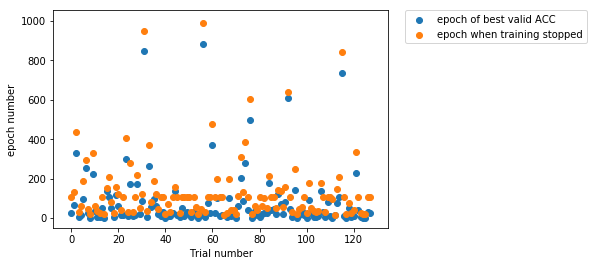

In [7]:
plt.scatter(xr, dataRaw['bestEpo'], label='epoch of best valid ACC')
plt.scatter(xr, dataRaw['epoch'], label='epoch when training stopped')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Trial number')
plt.ylabel('epoch number')

(0, 0.06)

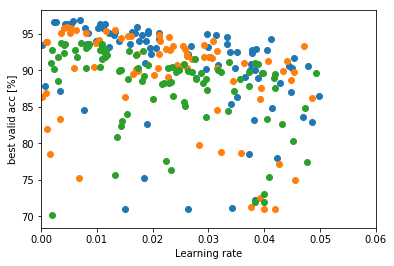

In [24]:
plot1=plt.scatter(dataRaw['LR'].loc[dataRaw['best_val_acc']>0.7],100*dataRaw['best_val_acc'].loc[dataRaw['best_val_acc']>0.7])
plot1=plt.scatter(dataFeat['LR'].loc[dataFeat['best_val_acc']>0.7],100*dataFeat['best_val_acc'].loc[dataFeat['best_val_acc']>0.7])
plot1=plt.scatter(dataFpcm['LR'].loc[dataFpcm['best_val_acc']>0.7],100*dataFpcm['best_val_acc'].loc[dataFpcm['best_val_acc']>0.7])
plot1=plt.xlabel('Learning rate')
plot1=plt.ylabel('best valid acc [%]')
axes = plt.gca()
axes.set_xlim([0,0.06])
#axes.set_ylim([96,97])


In [167]:
def getCumulatedPlot(myData,trials):
    resolution=200
    h=np.histogram(myData,bins=resolution, range=[0.0,1.0])
    h=h[0]
    c=np.cumsum(h)/trials
    tmpx = np.linspace(0,trials,num=resolution)/trials
    firstOne = np.argmax(c)+1
    c=c[0:firstOne]
    tmpx=tmpx[0:firstOne]
    
    return c, tmpx

In [170]:
c1,tmpx1 = getCumulatedPlot(dataRaw['best_val_acc'],   trials=128)
c2,tmpx2 = getCumulatedPlot(dataFeat['best_val_acc'],  trials=128)
c3,tmpx3 = getCumulatedPlot(dataHLfeat['best_val_acc'],trials=128)

(0, 100)

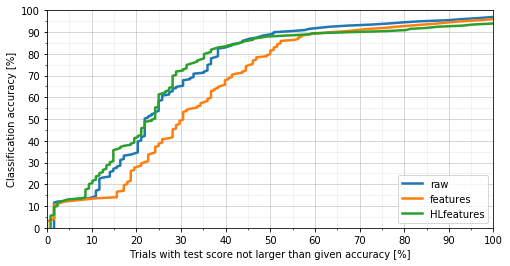

In [176]:
plt.figure(figsize=(8,4))
plt.plot(c1*100,100*tmpx1, label='raw', linewidth=2.5)
plt.plot(c2*100,100*tmpx2, label='features', linewidth=2.5)
plt.plot(c3*100,100*tmpx3, label='HLfeatures', linewidth=2.5)

plt.ylabel('Classification accuracy [%]')
plt.xlabel('Trials with test score not larger than given accuracy [%]')

axes = plt.gca()
plt.grid()
plt.legend(loc=4)

major_ticks = np.arange(0, 101, 10)                                              
minor_ticks = np.arange(0, 101, 5)                                               

axes.set_xticks(major_ticks)                                                       
axes.set_xticks(minor_ticks, minor=True)                                           
axes.set_yticks(major_ticks)                                                       
axes.set_yticks(minor_ticks, minor=True)

axes.grid(which='both')                                                            
                           
axes.grid(which='minor', alpha=0.2)                                                
axes.grid(which='major', alpha=0.5) 
axes.set_ylim([0,100])
axes.set_xlim([0,100])

#plt.savefig('cumulatedPlot.png',dpi=600)

In [43]:
limits = [4,8,16,32,64,128]
def top4(dataType):    
    boxplt=[]

    for my_range in limits:
        zakres = dataType['best_tst_acc'][0:my_range]
        zakres = np.sort(zakres)        
        zakres = zakres[-4:]*100 #top 4    
        print('{:.3f}\t{:.3f}\t{:.3f}'.format(max(zakres),np.mean(zakres),np.std(zakres)))            
        boxplt.append(zakres)
    print('--------------------------')
    return boxplt

In [44]:
bp1 = top4(dataRaw)
bp2 = top4(dataFeat)
bp3 = top4(dataFpcm)

95.333	78.451	27.140
95.333	92.315	3.295
95.333	92.315	3.295
96.469	96.315	0.184
96.469	96.315	0.184
96.889	96.617	0.197
--------------------------
95.358	81.049	13.922
95.506	94.549	0.892
95.506	95.068	0.371
95.753	95.531	0.142
95.753	95.531	0.142
96.025	95.698	0.214
--------------------------
91.827	64.432	26.448
91.827	90.685	1.142
91.827	91.222	0.759
93.383	92.994	0.502
93.383	92.994	0.502
93.605	93.414	0.114
--------------------------


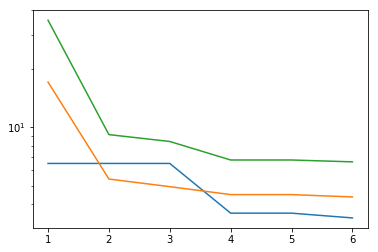

In [45]:
bledy1 = 100 -np.median(bp1,axis=1)
bledy2 = 100 -np.median(bp2,axis=1)
bledy3 = 100 -np.median(bp3,axis=1)

plt.semilogy(range(1,7),bledy1)
plt.semilogy(range(1,7),bledy2)
plt.semilogy(range(1,7),bledy3)

([<matplotlib.axis.XTick at 0x161de87be80>,
 <a list of 6 Text xticklabel objects>)

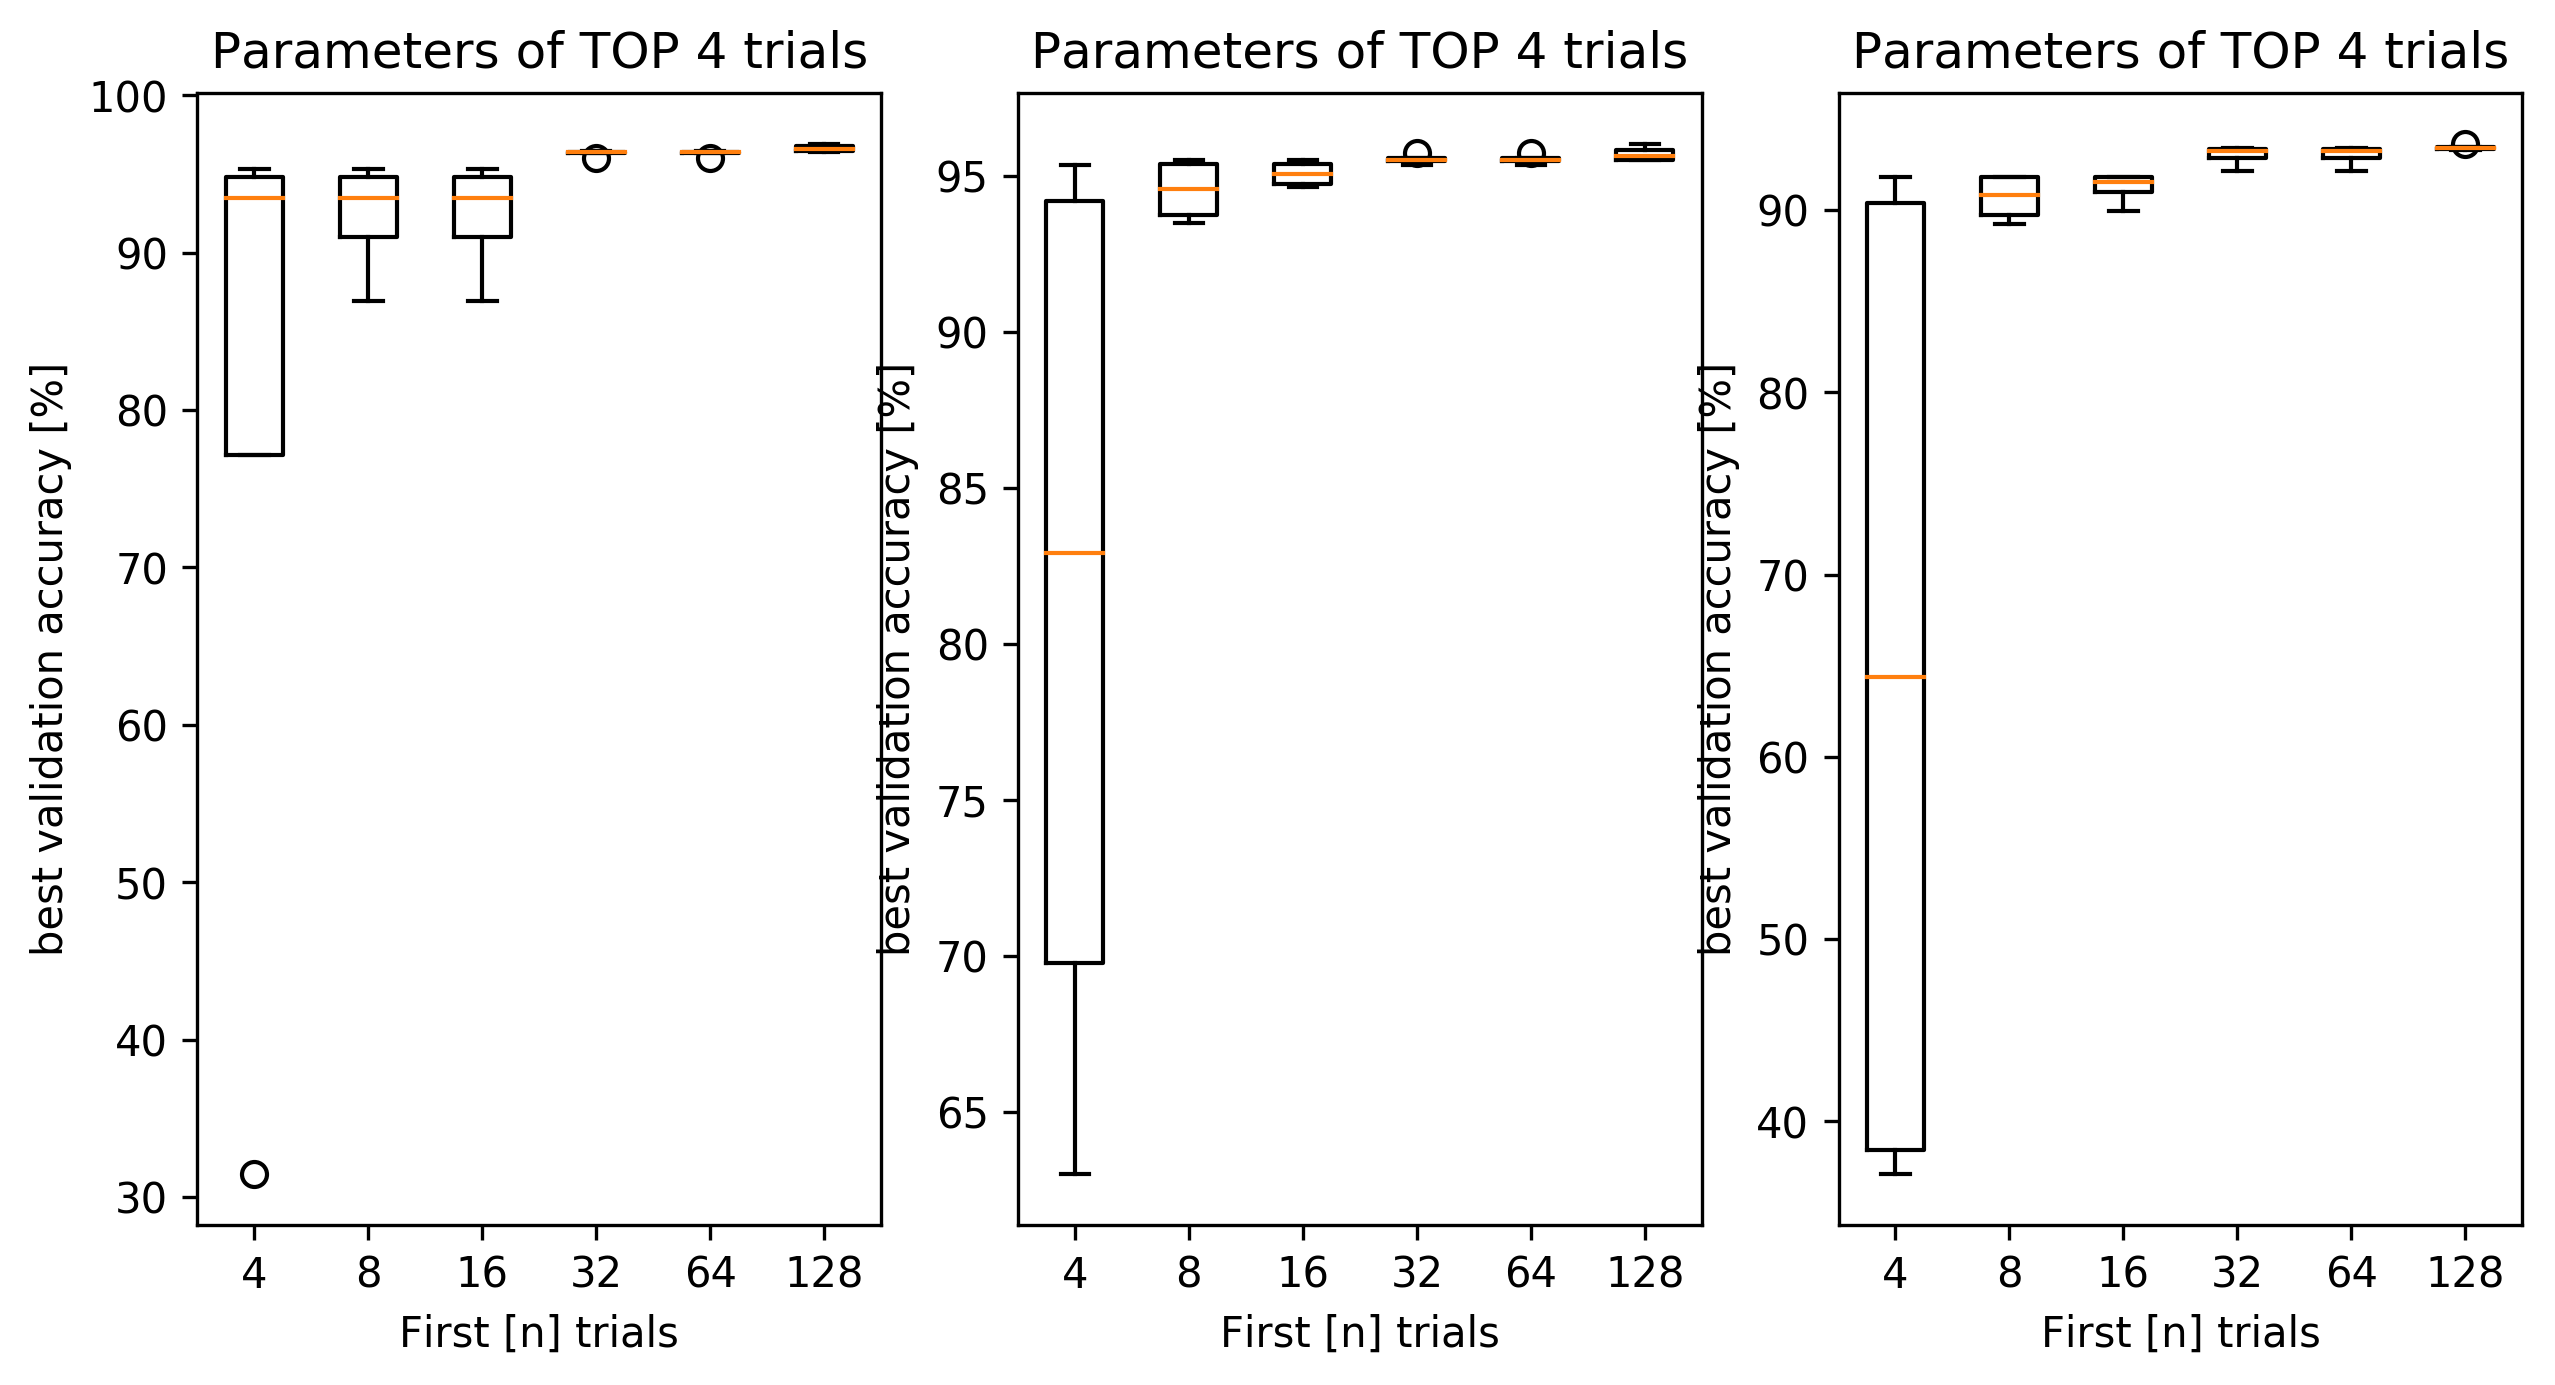

In [178]:
plt.figure(figsize=(10,5), dpi=300)
plt.subplot(131)
plt.boxplot(bp1)
plt.xlabel('First [n] trials')
plt.ylabel('best validation accuracy [%]')
plt.title('Parameters of TOP 4 trials')
plt.xticks(range(1,7),limits)

plt.subplot(132)
plt.boxplot(bp2)
plt.xlabel('First [n] trials')
plt.ylabel('best validation accuracy [%]')
plt.title('Parameters of TOP 4 trials')
plt.xticks(range(1,7),limits)

plt.subplot(133)
plt.boxplot(bp3)
plt.xlabel('First [n] trials')
plt.ylabel('best validation accuracy [%]')
plt.title('Parameters of TOP 4 trials')
plt.xticks(range(1,7),limits)



In [20]:
zakres = dataRaw['best_tst_acc'].as_matrix()  
t2 = np.split(zakres,8)   
print(np.max(t2,axis=1))

[0.953333 0.964692 0.953087 0.957531 0.968889 0.961235 0.961729 0.967161]


In [21]:
limits = [1,2,4,8,16,32,64]
boxplt2=[]


for my_range in limits:
    zakres = dataRaw['best_tst_acc'].as_matrix()  
    
    set_size = 128/my_range
    
    t2 = np.split(zakres,set_size)        
    topres = np.max(t2,axis=1)                    
    boxplt2.append(topres)

([<matplotlib.axis.XTick at 0x278902e90f0>,
 <a list of 7 Text xticklabel objects>)

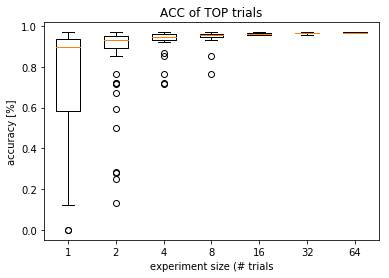

In [22]:
plt.boxplot(boxplt2)
plt.xlabel('experiment size (# trials')
plt.ylabel('accuracy [%]')
plt.title('ACC of TOP trials')
plt.xticks(range(1,8),limits)
#axes = plt.gca()
#axes.set_ylim([0.96,0.97])

In [23]:
oraw = dataRaw.loc[dataRaw['best_val_acc'] > 0.959]
ooraw = oraw.loc[oraw['layers']>2]
print(oraw.shape)
print(ooraw.shape)

oraw = dataFeat.loc[dataFeat['best_val_acc'] > 0.948]
ooraw = oraw.loc[oraw['layers']>2]
print(oraw.shape)
print(ooraw.shape)

oraw = dataFpcm.loc[dataFpcm['best_val_acc'] > 0.9282]
ooraw = oraw.loc[oraw['layers']>2]
print(oraw.shape)
print(ooraw.shape)

(10, 13)
(7, 13)
(10, 13)
(3, 13)
(10, 13)
(5, 13)


In [88]:
def getSTDofTOP3(my_data):
    temp=np.sort(my_data)
    return np.std(temp[-3:]*100)

In [100]:
print("raw \t\tstd: {0:.4f}%".format( getSTDofTOP3(dataRaw['best_val_acc'])))
print("features \tstd: {0:.4f}%".format( getSTDofTOP3(dataFeat['best_val_acc'])))
print("HLfeatures \tstd: {0:.4f}%".format( getSTDofTOP3(dataFpcm['best_val_acc'])))


raw 		std: 0.0727%
features 	std: 0.0727%
HLfeatures 	std: 0.0534%


In [101]:
dataFeat.loc[dataFeat['best_val_acc'] > 0.957]

,layers,neurons,LR,dropout,act_fcn,epoch,kernel,stdDiagV,stdDiagT,fin_val_acc,best_val_acc,bestEpo,best_tst_acc
1,1,65,0.004096,1.0,<function elu at 0x7f76b1a54668>,305,Xavier,2.733725,3.000584,0.000000,0.957778,255,0.953580
5,2,48,0.005117,0.7,<function softsign at 0x7fdec094bc80>,625,He,2.951418,2.903939,0.950617,0.958272,520,0.957531
1,1,78,0.004618,1.0,<function elu at 0x7f83435b5668>,300,None,2.798741,2.424032,0.949877,0.959506,195,0.960247


In [103]:
dataFpcm.loc[dataFpcm['best_val_acc'] > 0.9363]

,layers,neurons,LR,dropout,act_fcn,epoch,kernel,stdDiagV,stdDiagT,fin_val_acc,best_val_acc,bestEpo,best_tst_acc
6,3,32,0.003548,1.0,<function elu at 0x7f2e00133668>,350,None,3.802309,4.262675,0.926667,0.937531,245,0.933827
6,1,91,0.004312,1.0,<function tanh at 0x7ff763d0a488>,345,He,4.612991,4.359686,0.605185,0.936543,240,0.929630
3,3,33,0.007130,0.7,<function elu at 0x7fe894e62668>,260,None,4.565031,4.881526,0.000000,0.937778,200,0.931358
10,1,60,0.010896,1.0,<function softsign at 0x7ff04854ac80>,265,None,4.026130,4.382003,0.000000,0.936543,160,0.936050


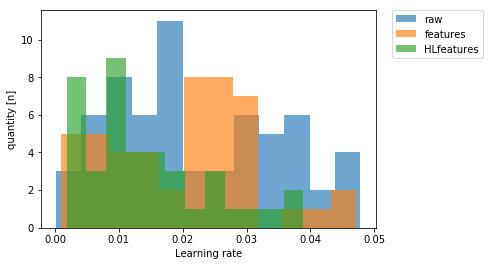

In [107]:
najl1 = dataRaw['LR'].loc[dataRaw['best_val_acc']> 0.9]
najl2 = dataFeat['LR'].loc[dataFeat['best_val_acc']> 0.9]
najl3 = dataFpcm['LR'].loc[dataFpcm['best_val_acc']> 0.9]

mybins = 12
plt.hist(najl1, alpha=0.65, bins=mybins, label='raw')
plt.hist(najl2, alpha=0.65, bins=mybins, label='features')
plt.hist(najl3, alpha=0.65, bins=mybins, label='HLfeatures')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('quantity [n]')
plt.xlabel('Learning rate')

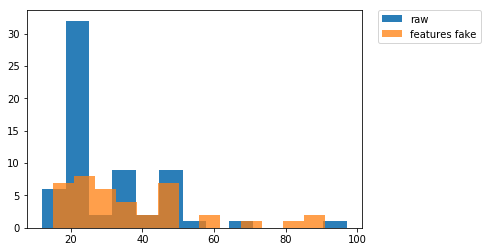

In [108]:
n1 = dataRaw['neurons'].loc[dataRaw['best_val_acc']> 0.9]
n3 = dataFpcm['neurons'].loc[dataFpcm['best_val_acc']> 0.9]


plt.hist(n1, alpha=0.95, bins=13, label='raw')
plt.hist(n3, alpha=0.75, bins=13, label='features fake')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [112]:
baseDF=dataFpcm

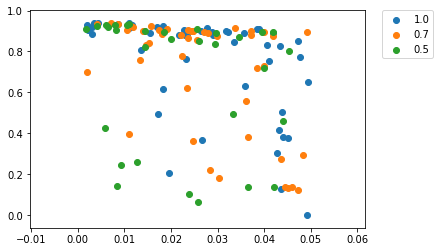

In [113]:
plt.scatter(baseDF['LR'].loc[baseDF['dropout'] == 1.0],baseDF['best_val_acc'].loc[baseDF['dropout'] == 1.0],label='1.0')
plt.scatter(baseDF['LR'].loc[baseDF['dropout'] == 0.7],baseDF['best_val_acc'].loc[baseDF['dropout'] == 0.7],label='0.7')
plt.scatter(baseDF['LR'].loc[baseDF['dropout'] == 0.5],baseDF['best_val_acc'].loc[baseDF['dropout'] == 0.5],label='0.5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

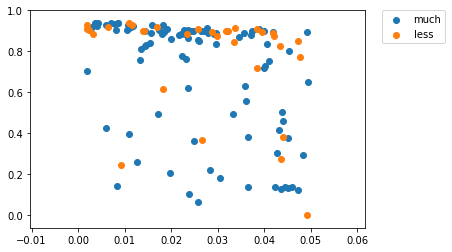

In [114]:
plt.scatter(baseDF['LR'].loc[baseDF['neurons']*baseDF['layers'] > 80],\
       baseDF['best_val_acc'].loc[baseDF['neurons']*baseDF['layers'] > 80],label='much')
plt.scatter(baseDF['LR'].loc[baseDF['neurons']*baseDF['layers'] <= 80],\
       baseDF['best_val_acc'].loc[baseDF['neurons']*baseDF['layers'] <= 80],label='less')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

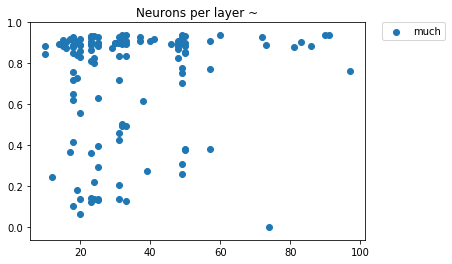

In [115]:
plt.scatter(baseDF['neurons'],baseDF['best_val_acc'],label='much')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Neurons per layer ~')

(0, 5)

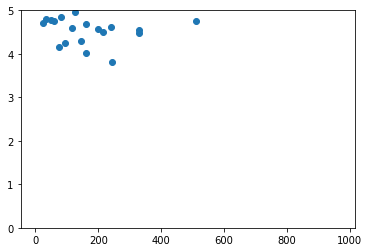

In [116]:
plt.scatter(baseDF['bestEpo'],baseDF['stdDiagV'])
axes = plt.gca()
axes.set_ylim([0,5])

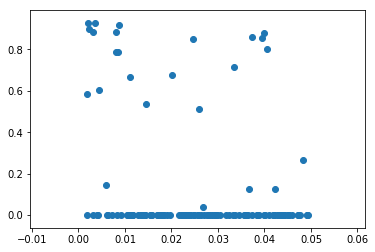

In [117]:
plt.scatter(baseDF['LR'],baseDF['fin_val_acc'])

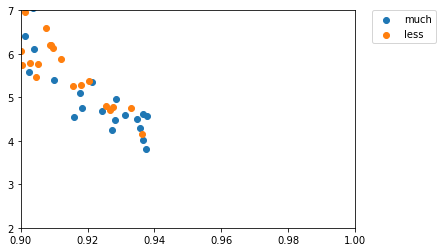

In [118]:
plt.scatter(baseDF['best_val_acc'].loc[baseDF['bestEpo']> 80],\
            baseDF['stdDiagV'].loc[baseDF['bestEpo'] > 80],label='much')
plt.scatter(baseDF['best_val_acc'].loc[baseDF['bestEpo']< 80],\
            baseDF['stdDiagV'].loc[baseDF['bestEpo'] < 80],label='less')
axes = plt.gca()
axes.set_ylim([2,7])
axes.set_xlim([0.9,1.0])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)